<a href="https://colab.research.google.com/github/NBELab/NeMo/blob/main/tutorials/image_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nengo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.5/538.5 kB 7.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import nengo
from nengo.dists import Uniform

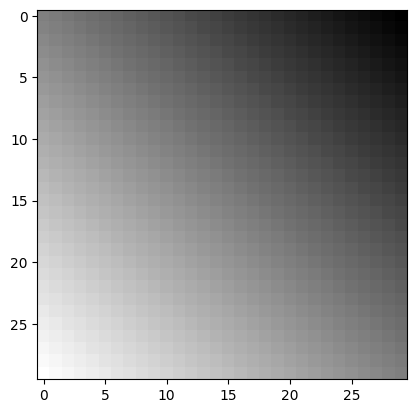

In [ ]:
#input images
h = 30
w = 30
#image = np.random.randint(0, 256, (h, w), dtype=np.uint8)


# Create an empty image (all black initially)
image = np.zeros((h, w), dtype=np.uint8)

# Generate gradient
for i in range(h):
    for j in range(w):
        # Calculate grayscale value based on position
        #  Moves from 0 (black) at top right to 255 (white) at bottom left
        gray_value = int((i / (h - 1)) * 255 + (1 - (j / (w - 1))) * 255 ) /2


        # Cap the gray value at 255 to avoid overflow
        gray_value = min(gray_value, 255)


        image[i, j] = gray_value


plt.imshow(image, cmap='gray')


In [ ]:

gray_input = 1*np.reshape(image/255.0, (1,1,h*w))
print(gray_input.shape)


(1, 1, 900)


In [ ]:
present_time = 1
n = h*w

net = nengo.Network(label="Image_input")
with net:
  gray_node = nengo.Node(nengo.processes.PresentInput(
      gray_input, presentation_time=present_time
  ))

  ens_arr1 = nengo.networks.EnsembleArray(
        1,
        h*w,
        intercepts=Uniform(0, 0),
        max_rates=Uniform(200, 200),
        encoders=[[1]],
        neuron_type=nengo.SpikingRectifiedLinear()
    )
  ens_arr2 = nengo.networks.EnsembleArray(
        5,
        h*w,
        max_rates=Uniform(100, 200),
        neuron_type=nengo.LIF()
    )
  nengo.Connection(gray_node, ens_arr1.input,transform=1)
  nengo.Connection(gray_node, ens_arr2.input,transform=1)

  out1 = nengo.Probe(ens_arr1.output, synapse=0.05)
  out2 = nengo.Probe(ens_arr2.output, synapse=0.05)

print(net.n_neurons)

5400


In [ ]:
runtime = 1 * present_time
with nengo.Simulator(net) as sim:
#with nengo.Simulator(nengo_converter.net) as sim:
    sim.run(runtime)

ERROR:nengo.cache:Decoder cache index corrupted. Reinitializing cache.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 467, in __enter__
    self._load_index_file()
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 389, in _load_index_file
    with self.index_path.open("rb") as f:
  File "/usr/lib/python3.10/pathlib.py", line 1119, in open
    return self._accessor.open(self, mode, buffering, encoding, errors,
FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/nengo/decoders/index'


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [ ]:
image_out1 = np.reshape(sim.data[out1][-1],(h,w))
image_out2 = np.reshape(sim.data[out2][-1],(h,w))


plt.figure()
plt.imshow(image_out1, cmap = plt.get_cmap('gray'))
plt.title('1 SpikingRectifiedLinear')
plt.figure()
plt.imshow(image_out2, cmap = plt.get_cmap('gray'))
plt.title('5 LIF')
plt.figure()
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.title('original')

In [ ]:
rms_error1 = np.sqrt(np.mean((image_out1 - image/255.0)**2))
rms_error2 = np.sqrt(np.mean((image_out2 - image/255.0)**2))

print("SpikingRectifiedLinear RMSE: ",rms_error1)
print("LIF RMSE: ", rms_error2)

With many neurons:

In [ ]:
present_time = 1
n = h*w

net = nengo.Network(label="Image_input")
with net:
  gray_node = nengo.Node(nengo.processes.PresentInput(
      gray_input, presentation_time=present_time
  ))

  ens_arr1 = nengo.networks.EnsembleArray(
        100,
        h*w,
        intercepts=Uniform(0, 0),
        max_rates=Uniform(100, 200),
        #encoders=[[1]],
        neuron_type=nengo.SpikingRectifiedLinear()
    )
  ens_arr2 = nengo.networks.EnsembleArray(
        500,
        h*w,
        max_rates=Uniform(100, 200),
        neuron_type=nengo.LIF()
    )
  nengo.Connection(gray_node, ens_arr1.input,transform=1)
  nengo.Connection(gray_node, ens_arr2.input,transform=1)

  out1 = nengo.Probe(ens_arr1.output, synapse=0.05)
  out2 = nengo.Probe(ens_arr2.output, synapse=0.05)

print(net.n_neurons)

In [ ]:
runtime = 1 * present_time
with nengo.Simulator(net) as sim:
#with nengo.Simulator(nengo_converter.net) as sim:
    sim.run(runtime)

In [ ]:
image_out1 = np.reshape(sim.data[out1][-1],(h,w))
image_out2 = np.reshape(sim.data[out2][-1],(h,w))


plt.figure()
plt.imshow(image_out1, cmap = plt.get_cmap('gray'))
plt.title('1 SpikingRectifiedLinear')
plt.figure()
plt.imshow(image_out2, cmap = plt.get_cmap('gray'))
plt.title('5 LIF')
plt.figure()
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.title('original')

In [ ]:
rms_error1 = np.sqrt(np.mean((image_out1 - image/255.0)**2))
rms_error2 = np.sqrt(np.mean((image_out2 - image/255.0)**2))

print("SpikingRectifiedLinear RMSE: ",rms_error1)
print("LIF RMSE: ", rms_error2)